# Final Project - The Battle of Neighbourhoods

## Import all necessary libraries

In [75]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import urllib.request, urllib.parse, urllib.error

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import json # library to handle JSON files

In [6]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
%matplotlib inline

## Read Sales Price data

In [7]:
filename = 'NYC_Citywide_Annualized_Calendar_Sales_Update.csv'
df_data_1 = pd.read_csv(filename)
df_data_1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,CHELSEA,21 OFFICE BUILDINGS,4,697,5,NaN,O2,555 WEST 25TH STREET,NaN,...,43300000,03/28/2019,40.749704,-74.004930,104.0,3.0,99.0,1012379.0,1.006970e+09,Hudson Yards-Chelsea-Flatiron-Union Square
1,1,CHELSEA,21 OFFICE BUILDINGS,4,697,23,NaN,O6,511 WEST 25TH STREET,NaN,...,148254147,05/23/2019,40.749364,-74.004132,104.0,3.0,99.0,1012382.0,1.006970e+09,Hudson Yards-Chelsea-Flatiron-Union Square
2,1,CHELSEA,21 OFFICE BUILDINGS,4,700,55,NaN,O2,538 WEST 29TH STREET,NaN,...,11000000,03/13/2019,40.752067,-74.002931,104.0,3.0,99.0,1012435.0,1.007000e+09,Hudson Yards-Chelsea-Flatiron-Union Square
3,1,CHELSEA,21 OFFICE BUILDINGS,4,712,1,NaN,O6,450 WEST 15TH,NaN,...,591800000,05/22/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,CHELSEA,21 OFFICE BUILDINGS,4,746,64,NaN,O8,340 WEST 23RD STREET,NaN,...,0,04/01/2019,40.745809,-73.999729,104.0,3.0,93.0,1013367.0,1.007460e+09,Hudson Yards-Chelsea-Flatiron-Union Square


Study the data

In [8]:
df_data_1.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,345059.000000,345059.000000,345059.000000,0.0,345044.000000,329081.000000,329081.000000,329081.000000,339532.000000,345059.000000,3.450590e+05,334109.000000,334109.000000,334109.000000,334109.000000,334109.000000,3.329090e+05,3.329090e+05
mean,2.995751,4306.570584,367.702468,NaN,10763.724455,2.004582,0.225589,2.269605,1812.411187,1.653775,1.172742e+06,40.708279,-73.930439,306.961246,26.686991,9933.177873,3.143269e+06,3.031258e+09
std,1.292591,3617.445532,661.851654,NaN,1123.207491,14.530337,6.935012,16.214932,500.193376,0.832021,1.232912e+07,0.080352,0.103430,128.750556,15.741102,26918.593289,1.345751e+06,1.310977e+09
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,40.498924,-74.254897,101.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,2.000000,1330.000000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00,40.648220,-73.983755,209.000000,13.000000,149.000000,2.049511e+06,2.037740e+09
50%,3.000000,3361.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1940.000000,1.000000,4.138650e+05,40.713274,-73.943310,313.000000,28.000000,394.000000,3.231406e+06,3.062410e+09
75%,4.000000,6383.000000,438.000000,NaN,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05,40.761848,-73.855966,408.000000,40.000000,1118.000000,4.214870e+06,4.066380e+09
max,5.000000,16350.000000,9139.000000,NaN,11697.000000,2229.000000,2261.000000,2261.000000,2020.000000,4.000000,2.397502e+09,40.912869,-73.700376,503.000000,51.000000,157903.000000,5.516445e+06,5.080500e+09


Filter data and create a new dataframe

In [11]:
df_data_2 = df_data_1.filter(['NEIGHBORHOOD', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'ADDRESS', 'ZIP CODE', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE'], axis=1)
df_data_2.head()

,NEIGHBORHOOD,LAND SQUARE FEET,GROSS SQUARE FEET,ADDRESS,ZIP CODE,YEAR BUILT,SALE PRICE,SALE DATE
0,CHELSEA,"7,406","40,926",555 WEST 25TH STREET,10001.0,1926.0,43300000,03/28/2019
1,CHELSEA,"9,890","83,612",511 WEST 25TH STREET,10001.0,1917.0,148254147,05/23/2019
2,CHELSEA,"2,498","7,380",538 WEST 29TH STREET,10001.0,1910.0,11000000,03/13/2019
3,CHELSEA,"34,188","281,361",450 WEST 15TH,10011.0,1936.0,591800000,05/22/2019
4,CHELSEA,"2,469","5,603",340 WEST 23RD STREET,10011.0,1900.0,0,04/01/2019


Clean the data - remove rows with na values, change types, filter reasonable data

In [12]:
df_data_2 = df_data_2.dropna().copy()
df_data_2['GROSS SQUARE FEET'] = df_data_2['GROSS SQUARE FEET'].str.replace('-', '')
df_data_2['GROSS SQUARE FEET'] = df_data_2['GROSS SQUARE FEET'].str.replace(',', '')
df_data_2['LAND SQUARE FEET'] = df_data_2['LAND SQUARE FEET'].str.replace('-', '')
df_data_2['LAND SQUARE FEET'] = df_data_2['LAND SQUARE FEET'].str.replace(',', '')
df_data_2 = df_data_2.astype({'YEAR BUILT' : int})
df_data_2 = df_data_2.astype({'LAND SQUARE FEET' : int})
df_data_2 = df_data_2.astype({'GROSS SQUARE FEET' : int})
df_data_2 = df_data_2[df_data_2["YEAR BUILT"] >= 1920]
df_data_2['SALE PRICE'] = df_data_2["SALE PRICE"] / 100
df_data_2 = df_data_2[df_data_2["SALE PRICE"] > 100000]
df_data_2 = df_data_2[(df_data_2[['LAND SQUARE FEET','GROSS SQUARE FEET']] != 0).all(axis=1)]
df_data_2.head()

,NEIGHBORHOOD,LAND SQUARE FEET,GROSS SQUARE FEET,ADDRESS,ZIP CODE,YEAR BUILT,SALE PRICE,SALE DATE
0,CHELSEA,7406,40926,555 WEST 25TH STREET,10001.0,1926,433000.0,03/28/2019
3,CHELSEA,34188,281361,450 WEST 15TH,10011.0,1936,5918000.0,05/22/2019
6,CHELSEA,10225,197612,307 7 AVENUE,10001.0,1926,1150000.0,10/17/2019
8,CHELSEA,4938,15716,250 WEST 23RD STREET,10011.0,1948,145000.0,09/05/2019
13,CHELSEA,4937,8500,542 WEST 29TH STREET,10001.0,1946,213500.0,03/13/2019


In [14]:
df_data_2.describe()
df_data_2.shape

(1714, 8)

Import geo location data

In [15]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [16]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [17]:
neighborhoods_data = newyork_data['features']

In [18]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
     
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Wakefield,40.894705,-73.847201
1,Co-op City,40.874294,-73.829939
2,Eastchester,40.887556,-73.827806
3,Fieldston,40.895437,-73.905643
4,Riverdale,40.890834,-73.912585


In [19]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Import data from FourSquare - get the venues around New York City

In [20]:
CLIENT_ID = '2WQVRUNTFROPW0DANTJYOK4GQXLXH2GP3HFZSEMJKSKVBSIR' # your Foursquare ID
CLIENT_SECRET = 'F2TSNBJ3IKOKRBIHNBXOPL5S34WZXWNXVKJQMFGO1ARVJC3Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
neighborhood_name = 'New York City' # neighborhood name
radius = 100

In [21]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2WQVRUNTFROPW0DANTJYOK4GQXLXH2GP3HFZSEMJKSKVBSIR&client_secret=F2TSNBJ3IKOKRBIHNBXOPL5S34WZXWNXVKJQMFGO1ARVJC3Q&ll=40.7127281,-74.0060152&v=20180605&radius=100&limit=100'

In [22]:
results = requests.get(url).json()
#results

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [24]:
venues = results['response']['venues']
#venues
  
nearby_venues = pd.json_normalize(venues) # flatten JSON
#print(nearby_venues)

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,City Hall Park,Park,40.711893,-74.007792
1,New York City Hall,City Hall,40.712659,-74.005880
2,NY Gift Shop,Gift Shop,40.717693,-73.999931
3,Mary's Coffee Shop,Coffee Shop,40.712786,-74.005944
4,Garden Of Eden,Flower Shop,40.712788,-74.005953


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
newyork_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

In [27]:
newyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


Group venues per Neighborhood and count the number of venues in each Neighborhood

In [28]:
newyork_venues['Count'] = 1
newyork_venues.reset_index(inplace = True) 
venues_list_grouped = newyork_venues.groupby(['Neighborhood','Venue Category'])['Count'].sum()
venues_list_grouped

Neighborhood  Venue Category       
Allerton      Breakfast Spot           1
              Chinese Restaurant       2
              Cosmetics Shop           1
              Deli / Bodega            2
              Department Store         1
                                      ..
Yorkville     Thai Restaurant          1
              Video Store              1
              Vietnamese Restaurant    2
              Wine Bar                 1
              Wine Shop                3
Name: Count, Length: 6994, dtype: int64

In [33]:
ny_grouped = pd.DataFrame(venues_list_grouped)
ny_grouped.reset_index(inplace = True) 
ny_grouped.rename(columns={'Neighborhood':'NEIGHBORHOOD'}, inplace=True)
ny_grouped['NEIGHBORHOOD'] = ny_grouped['NEIGHBORHOOD'].str.upper()
ny_grouped.head()

,NEIGHBORHOOD,Venue Category,Count
0,ALLERTON,Breakfast Spot,1
1,ALLERTON,Chinese Restaurant,2
2,ALLERTON,Cosmetics Shop,1
3,ALLERTON,Deli / Bodega,2
4,ALLERTON,Department Store,1


In [30]:
df_data_2.head()

,NEIGHBORHOOD,LAND SQUARE FEET,GROSS SQUARE FEET,ADDRESS,ZIP CODE,YEAR BUILT,SALE PRICE,SALE DATE
0,CHELSEA,7406,40926,555 WEST 25TH STREET,10001.0,1926,433000.0,03/28/2019
3,CHELSEA,34188,281361,450 WEST 15TH,10011.0,1936,5918000.0,05/22/2019
6,CHELSEA,10225,197612,307 7 AVENUE,10001.0,1926,1150000.0,10/17/2019
8,CHELSEA,4938,15716,250 WEST 23RD STREET,10011.0,1948,145000.0,09/05/2019
13,CHELSEA,4937,8500,542 WEST 29TH STREET,10001.0,1946,213500.0,03/13/2019


Transform the venues to columns

In [34]:
ny_regrouped = ny_grouped.pivot(index='NEIGHBORHOOD', columns='Venue Category', values='Count')
ny_regrouped = ny_regrouped.fillna(0)

In [35]:
ny_regrouped.describe()

Venue Category,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.036545,0.013289,0.013289,0.019934,0.534884,0.019934,0.006645,0.023256,0.029900,0.159468,...,0.006645,0.006645,0.006645,0.006645,0.013289,0.202658,0.295681,0.033223,0.093023,0.249169
std,0.187954,0.114700,0.114700,0.199001,1.001472,0.140005,0.081378,0.171631,0.170596,0.584082,...,0.081378,0.115278,0.081378,0.081378,0.114700,0.628856,0.745396,0.179516,0.333643,0.683892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,2.000000,1.000000,6.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,4.000000


Take only data that has more than 5 venues per location

In [37]:
ny_regrouped2 = ny_regrouped[ny_regrouped.columns[ny_regrouped.max() >= 5]]
ny_regrouped2.describe()

In [39]:
ny_regrouped2 = ny_regrouped2.rename({'Neighborhood': 'NEIGHBORHOOD'}, axis=1)

In [40]:
ny_regrouped2

Venue Category,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bar,Beach,Burger Joint,Café,Chinese Restaurant,Clothing Store,...,Park,Peruvian Restaurant,Pizza Place,Playground,Plaza,South American Restaurant,Spa,Sushi Restaurant,Thai Restaurant,Theater
NEIGHBORHOOD,,,,,,,,,,,,,,,,,,,,,
ALLERTON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ANNADALE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARDEN HEIGHTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARLINGTON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARROCHAR,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODHAVEN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
WOODLAWN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
WOODROW,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Merge the Venues data set and Sales Price data set

In [41]:
ny_merged = df_data_2.merge(ny_regrouped2, on='NEIGHBORHOOD', how='left')

In [43]:
ny_merged.shape

(1714, 48)

In [44]:
ny_merged.dropna(inplace=True)
ny_merged.shape

(799, 48)

In [45]:
ny_merged.describe()

,LAND SQUARE FEET,GROSS SQUARE FEET,ZIP CODE,YEAR BUILT,SALE PRICE,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bar,...,Park,Peruvian Restaurant,Pizza Place,Playground,Plaza,South American Restaurant,Spa,Sushi Restaurant,Thai Restaurant,Theater
count,799.000000,7.990000e+02,799.000000,799.000000,7.990000e+02,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,33150.016270,6.700607e+04,10873.831039,1954.073842,3.762188e+05,0.949937,0.584481,0.639549,1.381727,1.774718,...,0.708385,0.231539,2.051314,0.445557,0.153942,0.181477,0.635795,0.576971,0.819775,0.277847
std,65012.589594,1.226929e+05,559.224248,31.758224,7.915002e+05,1.313129,1.279317,0.909564,1.547321,2.232548,...,1.032707,0.925932,1.569164,0.661681,0.430750,0.793683,1.106495,0.781214,1.418658,1.071573
min,1100.000000,2.000000e+02,10001.000000,1920.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6191.500000,1.271450e+04,10036.000000,1928.000000,1.293299e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13250.000000,3.480000e+04,11205.000000,1941.000000,1.900000e+05,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30093.000000,6.937850e+04,11234.000000,1974.000000,3.300000e+05,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,795385.000000,1.741458e+06,11694.000000,2019.000000,1.767913e+07,4.000000,6.000000,5.000000,7.000000,8.000000,...,5.000000,6.000000,10.000000,3.000000,2.000000,5.000000,5.000000,3.000000,7.000000,7.000000


In [49]:
ny_merged.dtypes

NEIGHBORHOOD                  object
LAND SQUARE FEET               int64
GROSS SQUARE FEET              int64
ADDRESS                       object
ZIP CODE                     float64
YEAR BUILT                     int64
SALE PRICE                   float64
SALE DATE                     object
American Restaurant          float64
Art Gallery                  float64
Bagel Shop                   float64
Bakery                       float64
Bar                          float64
Beach                        float64
Burger Joint                 float64
Café                         float64
Chinese Restaurant           float64
Clothing Store               float64
Cocktail Bar                 float64
Coffee Shop                  float64
Dance Studio                 float64
Deli / Bodega                float64
Exhibit                      float64
Food Truck                   float64
Grocery Store                float64
Gym                          float64
Gym / Fitness Center         float64
H

Drop Restaurant columns

In [52]:
ny_merged.drop(['Thai Restaurant', 'Sushi Restaurant', 'South American Restaurant', 'Peruvian Restaurant', 'New American Restaurant', 'Middle Eastern Restaurant'], axis = 1, inplace=True)
ny_merged.drop(['Mexican Restaurant', 'Latin American Restaurant', 'Korean Restaurant', 'Italian Restaurant', 'Chinese Restaurant', 'Hotpot Restaurant', 'American Restaurant'], axis = 1, inplace=True)

In [53]:
ny_merged.dtypes

NEIGHBORHOOD             object
LAND SQUARE FEET          int64
GROSS SQUARE FEET         int64
ADDRESS                  object
ZIP CODE                float64
YEAR BUILT                int64
SALE PRICE              float64
SALE DATE                object
Art Gallery             float64
Bagel Shop              float64
Bakery                  float64
Bar                     float64
Beach                   float64
Burger Joint            float64
Café                    float64
Clothing Store          float64
Cocktail Bar            float64
Coffee Shop             float64
Dance Studio            float64
Deli / Bodega           float64
Exhibit                 float64
Food Truck              float64
Grocery Store           float64
Gym                     float64
Gym / Fitness Center    float64
Hookah Bar              float64
Hotel                   float64
Hotel Bar               float64
Mobile Phone Shop       float64
Park                    float64
Pizza Place             float64
Playgrou

## Model Development

In [56]:
lm = LinearRegression()

In [54]:
features =["LAND SQUARE FEET", "GROSS SQUARE FEET", "Hotel", "Playground"]    
X = ny_merged[features]
Y = ny_merged['SALE PRICE']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [57]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lm.intercept_


23794.093044344976

In [59]:
lm.coef_

array([-9.66911567e-01,  4.50803556e+00,  3.24262791e+04,  1.35252762e+05])

In [60]:
lm.score(x_train, y_train)

0.3146694406432403

In [61]:
lm.score(x_test, y_test)

## Model Evaluation

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

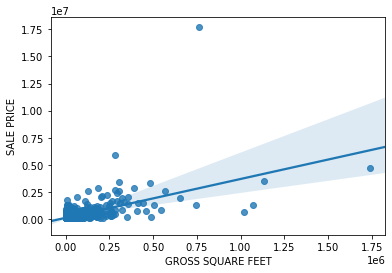

In [83]:
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=ny_merged)

In [62]:
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='Playground', ylabel='SALE PRICE'>

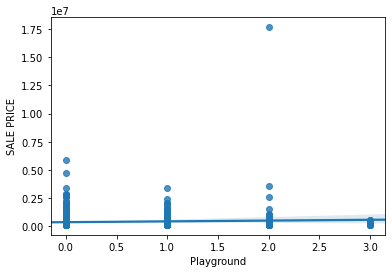

In [84]:
sns.regplot(x="Playground", y="SALE PRICE", data=ny_merged)

<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>

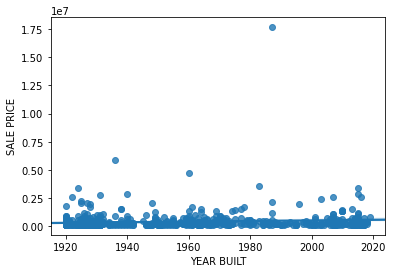

In [85]:
sns.regplot(x="YEAR BUILT", y="SALE PRICE", data=ny_merged)

In [63]:
Rcross = cross_val_score(lm, X, Y, cv=4)

In [64]:
Rcross

array([ 0.3289744 ,  0.22883004, -0.36341253,  0.49251294])

In [65]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.17172621418709272 and the standard deviation is 0.32298043190242687


In [66]:
yhat_train = lm.predict(x_train)
yhat_train [0:5]

array([176752.47509471, 170030.424732  , 140807.21306197, 347361.17070244,
       105697.14703248])

In [67]:
yhat_test = lm.predict(x_test)
yhat_test [0:5]

array([ 78724.17481439, 520873.4901375 , 345575.56240107, 456129.447484  ,
       240879.07822088])

In [68]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Parameters for a house')
    plt.ylabel('Price (in dollars)')

    plt.show()
    plt.close()

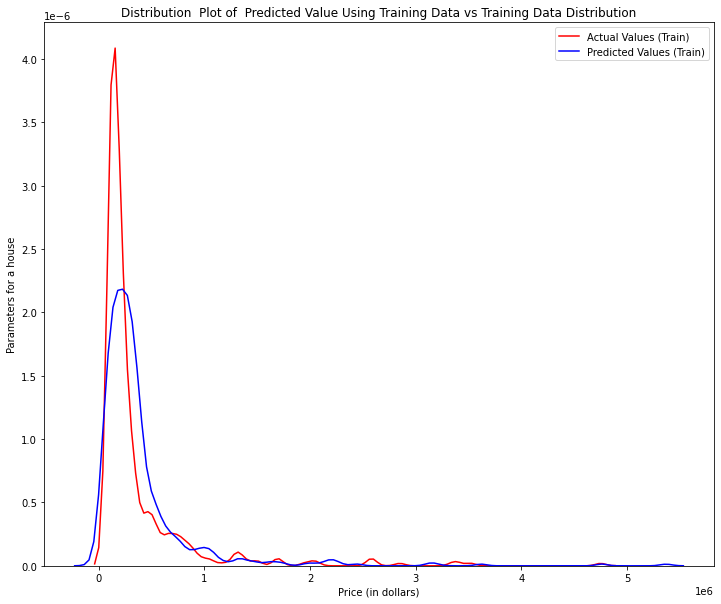

In [97]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

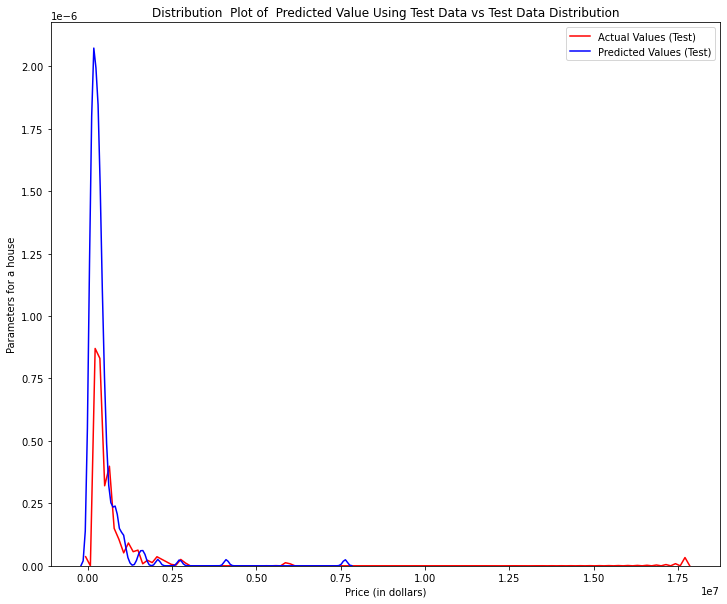

In [96]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)

In [88]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [89]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([770684.17010867, 382637.60645203, 251424.7606284 ,  58275.22658851,
       263481.38994565])

In [98]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [99]:
Ridge1 = Ridge(alpha=0.1)
Ridge1.fit(x_train, y_train)
Ridge1.score(x_train, y_train)


0.5411988837479373

In [112]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
R2 = Ridge(alpha=0.2)
R2.fit(x_train_pr, y_train)
R2.fit(x_test_pr, y_test)
R2.score(x_test_pr, y_test)

0.6139441067305855

## Conclusion

After 5 degree Polynomial Regression and Ridge Regression, we have a higher R Squared value that indicates the accuracy of the model.
We do see with the Regression plots, while Gross Square Feet has effect on the price, the other parameters, like Playground or Year built didnt have an impact on the price of the properties